# **Import Data**

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 

#import data
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/MyDrive/🏀 General/⚾ MWNH/Intelijug/Jug Data 2.csv')

#constants
gravity = 9.81
interval = 0.11 #seconds

df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g)
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0


# **Functions**

In [2]:
# "zero" the time readings
def zerotime(dataframe, old, new):
  dataframe[new] = dataframe[old] - dataframe[old][0]

#estimate postion based on linear acceleration
def posest(df, old, new):
  a_g = df[old] - df[old][0]
  a = a_g * gravity * 1000
  v = (a + a.shift(1)) / 2 * interval
  s_interval = v * interval
  df[new] = s_interval + s_interval.shift(1)

#estimate angle based on angular acceleration 
def direst(df, old, new):
  angular_a = df[old] - df[old][0]
  angular_v = (angular_a + angular_a.shift(1)) / 2 * interval
  angular_d = angular_v * interval
  df[new] = angular_d + angular_d.shift(1)

# **"Zero" Time Readings**

In [3]:
zerotime(df, "Time(ms)", "time_elapsed(ms)")
df.head()

,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g),time_elapsed(ms)
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4,0
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2,111
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4,222
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8,332
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0,444


# **Estimate Position**

In [4]:
posest(df, "A-X1", "L-R position estimate")
posest(df, "A-Y1", "U-D position estimate")
posest(df, "A-Z1", "I-O position estimate")
df.head()

,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g),time_elapsed(ms),L-R position estimate,U-D position estimate,I-O position estimate
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4,0,NaN,NaN,NaN
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2,111,NaN,NaN,NaN
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4,222,2.142553,4.154535,-6.522620
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8,332,-3.418589,6.504815,3.329563
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0,444,-20.594624,10.730570,5.038857


# **Estimate Direction**

In [5]:
direst(df, "G-Y", "Rotate (y)")
direst(df, "G-X", "Drink (x)")
direst(df, "G-Z", "Pour (z)")
df.head()

,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g),time_elapsed(ms),L-R position estimate,U-D position estimate,I-O position estimate,Rotate (y),Drink (x),Pour (z)
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2,111,NaN,NaN,NaN,NaN,NaN,NaN
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4,222,2.142553,4.154535,-6.522620,0.079195,0.179987,-0.002541
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8,332,-3.418589,6.504815,3.329563,0.791098,0.266381,-0.026681
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0,444,-20.594624,10.730570,5.038857,2.185260,0.284592,-0.056326


# **Plot Data**

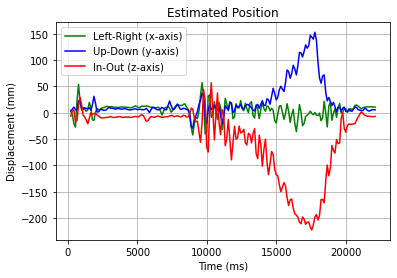

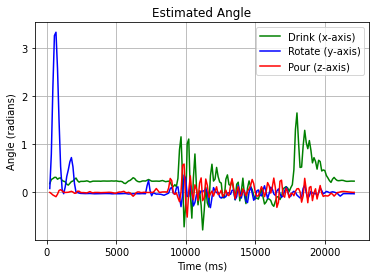

,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g),time_elapsed(ms),L-R position estimate,U-D position estimate,I-O position estimate,Rotate (y),Drink (x),Pour (z)
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2,111,NaN,NaN,NaN,NaN,NaN,NaN
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4,222,2.142553,4.154535,-6.522620,0.079195,0.179987,-0.002541
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8,332,-3.418589,6.504815,3.329563,0.791098,0.266381,-0.026681
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0,444,-20.594624,10.730570,5.038857,2.185260,0.284592,-0.056326
5,1/10/2001,5:29:02,659542,58.50,58.25,0.0415,-1.0687,-0.0054,10.99,149.17,-11.76,28.1,555,-27.485217,5.804479,-16.689361,3.259679,0.309578,-0.073265
6,1/10/2001,5:29:03,659653,57.50,57.50,0.4270,-0.8530,0.0556,2.03,100.94,-3.92,5.9,666,21.205934,5.139753,-15.158118,3.329980,0.311272,-0.091899
7,1/10/2001,5:29:03,659764,57.00,56.75,-0.1196,-0.8847,0.2440,8.26,61.88,-2.59,32.9,777,53.931799,22.636281,12.879058,2.569374,0.271463,-0.039385
8,1/10/2001,5:29:03,659874,56.50,56.00,0.0376,-1.0180,0.0795,8.47,9.66,-0.42,27.4,887,21.259349,23.763940,29.099550,1.489026,0.293909,0.037268
9,1/10/2001,5:29:03,659986,55.75,55.25,-0.0010,-0.9799,-0.0117,2.80,-4.13,-3.29,-7.5,999,5.187234,8.320940,15.342104,0.537421,0.299838,0.054208


In [6]:
# Plot Position
plt.plot(df["time_elapsed(ms)"], df["L-R position estimate"], label = "Left-Right (x-axis)", color = "Green")
plt.plot(df["time_elapsed(ms)"], df["U-D position estimate"], label = "Up-Down (y-axis)", color = "Blue")
plt.plot(df["time_elapsed(ms)"], df["I-O position estimate"], label = "In-Out (z-axis)", color = "Red")
plt.title('Estimated Position')
plt.xlabel('Time (ms)')
plt.ylabel('Displacement (mm)')
plt.grid(True)
plt.legend()
plt.show()

# Plot angle
plt.plot(df["time_elapsed(ms)"], df["Drink (x)"], label = "Drink (x-axis)", color = "Green")
plt.plot(df["time_elapsed(ms)"], df["Rotate (y)"], label = "Rotate (y-axis)", color = "Blue")
plt.plot(df["time_elapsed(ms)"], df["Pour (z)"], label = "Pour (z-axis)", color = "Red")
plt.title('Estimated Angle')
plt.xlabel('Time (ms)')
plt.ylabel('Angle (radians)')
plt.grid(True)
plt.legend()
plt.show()

df.head(10)